In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('bank_churn.csv')

In [3]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2656,2657,15713267,Zimmer,779,Spain,Female,34,5,0.00,2,0,1,111676.63,0
1647,1648,15777904,Nock,703,France,Female,45,7,0.00,2,1,1,68831.72,0
2989,2990,15636428,Sutherland,703,Spain,Female,45,1,0.00,1,1,0,182784.11,1
6876,6877,15680421,Challis,591,France,Female,42,10,0.00,2,0,0,171099.22,0
7549,7550,15785705,Thomson,705,Germany,Female,44,10,106731.58,1,1,0,137419.87,1


In [4]:
df.drop(columns=['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [5]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df2 = pd.get_dummies(data=df,dtype='int64')
df2.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [8]:
df2

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


In [9]:
cols_to_scale = ['Tenure','CreditScore','Age','Balance','EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [10]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.4

In [11]:
X = df2.drop('Exited',axis='columns')
y = df2['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [12]:
len(X_train.columns)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(len(y_train))

(8000, 13)
(2000, 13)
(8000,)
8000


In [17]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(13, input_shape=(13,), activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 2s 3ms/step - loss: 0.5011 - accuracy: 0.7866
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4737 - accuracy: 0.7984
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4597 - accuracy: 0.8009
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4452 - accuracy: 0.8089
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4293 - accuracy: 0.8149
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4117 - accuracy: 0.8235
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3966 - accuracy: 0.8300
Epoch 8/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3849 - accuracy: 0.8335
Epoch 9/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3760 - accuracy: 0.8381
Epoch 10/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3710 - accura

In [18]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3294 - accuracy: 0.8662
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3299 - accuracy: 0.8668
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3292 - accuracy: 0.8658
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3286 - accuracy: 0.8665
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3295 - accuracy: 0.8627
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3300 - accuracy: 0.8649
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3293 - accuracy: 0.8645
Epoch 8/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3284 - accuracy: 0.8656
Epoch 9/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3292 - accuracy: 0.8660
Epoch 10/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3287 - accura

In [19]:
from sklearn.svm import SVC
svc_rbf=SVC()
svc_rbf.fit(X_train,y_train)
svc_rbf.score(X_test,y_test)

0.845

In [20]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 3ms/step - loss: 0.3481 - accuracy: 0.8595


[0.34810569882392883, 0.859499990940094]

In [21]:
yp = model.predict(X_test)
yp[:5]

63/63 [==============================] - 0s 2ms/step


array([[0.03839689],
       [0.12040668],
       [0.03409459],
       [0.05853177],
       [0.0588495 ]], dtype=float32)

In [22]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [23]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [24]:
y_test[:10]

7054    0
442     0
3954    0
2288    0
3196    0
6178    0
8351    0
5658    1
2065    0
413     1
Name: Exited, dtype: int64

In [25]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1595
           1       0.76      0.45      0.57       405

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



Text(95.72222222222221, 0.5, 'Truth')

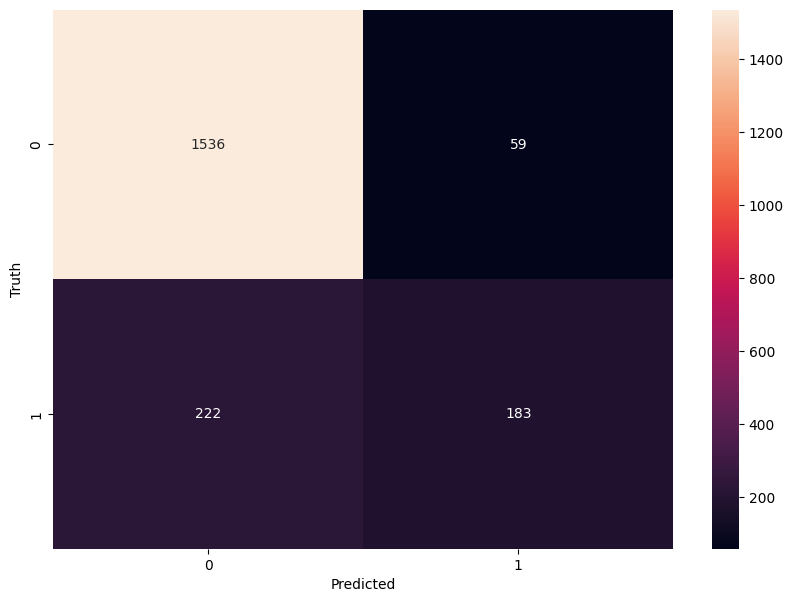

In [26]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')